# **Gradient Descent**
* Gradient Descent is defined as one of the most commonly used iterative optimization algorithms of machine learning to train the machine learning and deep learning models.
* It trains machine learning models by minimizing errors between predicted and actual results. It helps in finding the local minimum of a function.
#### The best way to define the local minimum or local maximum of a function using gradient descent is as follows:
- If we move towards a negative gradient or away from the gradient of the function at the current point, it will give the local minimum of that function.
- Whenever we move towards a positive gradient or towards the gradient of the function at the current point, we will get the local maximum of that function.

    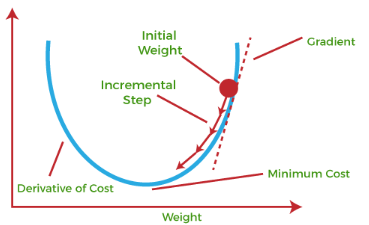

This entire procedure is known as **Gradient Ascent**, which is also known as **steepest descent**. The main objective of using a gradient descent algorithm is to minimize the cost function using iteration.

What is Cost-function?

The cost function is defined as the measurement of difference or error between actual values and expected values at the current position and present in the form of a single real number. \

### How Gradient Descent Works?
1. Initialize Parameters:
    Start with random values for model parameters (weights).
2. Compute the Loss Function:
    Measure how far predictions are from actual values.
3. Compute the Gradient:
    Find the derivative (slope) of the loss function with respect to parameters.
4. Update Parameters:
    Adjust weights opposite to the gradient direction (since we want to minimize the loss).

    𝜃 = 𝜃 − 𝛼 𝑑𝐽/𝑑𝜃
    * where:
        * 𝜃 = Parameter (Weight)
        * 𝛼 = Learning Rate (step size)
        * 𝐽 = Cost Function
5. Repeat Until Convergence:
    Stop when the change in the loss function is small or after a fixed number of iterations.

### Types of Gradient Descent:
1. Batch Gradient Descent:

    Batch gradient descent (BGD) is used to find the error for each point in the training set and update the model after evaluating all training examples. This procedure is known as the training epoch. In simple words, it is a greedy approach where we have to sum over all examples for each update.
2. Stochastic gradient descent:

    Stochastic gradient descent (SGD) is a type of gradient descent that runs one training example per iteration. Or in other words, it processes a training epoch for each example within a dataset and updates each training example's parameters one at a time. As it requires only one training example at a time, hence it is easier to store in allocated memory. However, it shows some computational efficiency losses in comparison to batch gradient systems as it shows frequent updates that require more detail and speed. Further, due to frequent updates, it is also treated as a noisy gradient. However, sometimes it can be helpful in finding the global minimum and also escaping the local minimum.
3. MiniBatch Gradient Descent:

    Mini Batch gradient descent is the combination of both batch gradient descent and stochastic gradient descent. It divides the training datasets into small batch sizes then performs the updates on those batches separately. Splitting training datasets into smaller batches make a balance to maintain the computational efficiency of batch gradient descent and speed of stochastic gradient descent. Hence, we can achieve a special type of gradient descent with higher computational efficiency and less noisy gradient descent.

### Challenges with the Gradient Descent:
1. Local Minima and Saddle Points:

    Gradient Descent works well for convex problems but struggles with non-convex problems, which have multiple local minima and saddle points.

    * Local Minima:
        - In non-convex loss functions, Gradient Descent can get stuck in a local minimum, where the cost function is lower than nearby points but not the lowest overall.
        - This can prevent the model from achieving optimal performance.
    * Saddle Points:
        - A saddle point occurs when the function is decreasing in one direction and increasing in another.
        - At a saddle point, the gradient becomes close to zero, making learning slow or causing the algorithm to stop updating.

2. Vanishing and Exploding Gradients:

    This issue is common in deep neural networks, where backpropagation causes gradients to become extremely small (vanishing) or large (exploding).

    * Vanishing Gradients:
        - Occurs when gradients become too small, slowing down learning in earlier layers.
        - This is a major issue in sigmoid or tanh activation functions, where gradients approach zero in deep networks.
    *   Exploding Gradients:
        - Happens when gradients grow too large, causing instability in the model.
        - This often leads to extremely large weight values, sometimes resulting in NaN values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1)

### Cost Function

In [3]:
def compute_cost(X, y, theta):
    """Calculate Mean Squared Error (MSE)"""
    m = len(y)
    predictions = X @ theta
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)

### Gradient Descent Function

In [4]:
def gradient_descent(X, y, learning_rate=0.1, iterations=50):
    """Perform Gradient Descent and Store History for Visualization"""
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X] 
    theta = np.random.randn(2, 1)  
    cost_history = [] 
    theta_history = []

    for _ in range(iterations):
        gradients = (1/m) * X_b.T @ (X_b @ theta - y)  
        theta -= learning_rate * gradients  
        cost = compute_cost(X_b, y, theta)
        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, theta_history

### Train Model


In [5]:
theta_optimal, cost_history, theta_history = gradient_descent(X, y)

### Visualize the Cost Function Convergence

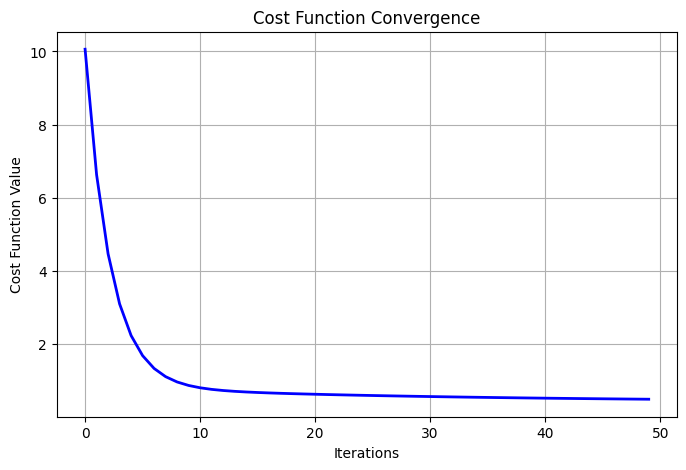

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()

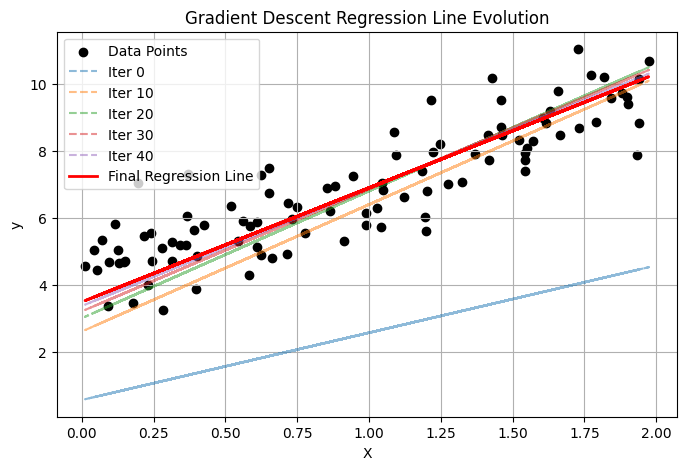

Optimal Parameters (Theta): [[3.48928119]
 [3.41092085]]


In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data Points", color='black')

X_b = np.c_[np.ones((len(X), 1)), X] 
for i in range(0, len(theta_history), 10):  
    y_pred = X_b @ theta_history[i]
    plt.plot(X, y_pred, linestyle="dashed", alpha=0.5, label=f"Iter {i}")

y_final = X_b @ theta_optimal
plt.plot(X, y_final, color="red", linewidth=2, label="Final Regression Line")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Descent Regression Line Evolution")
plt.legend()
plt.grid(True)
plt.show()

print("Optimal Parameters (Theta):", theta_optimal)